# Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# Dataset

In [2]:
# learning
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [3]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [4]:
# learning
X

array([[-6.94238952e+00, -6.88072230e+00],
       [ 8.14492336e+00,  7.52724561e+00],
       [-3.61995355e+00, -7.72691339e-02],
       [-8.91918262e+00, -6.77218900e+00],
       [-7.37151112e+00, -5.05064290e+00],
       [-4.65743008e+00,  5.07750808e-02],
       [-9.85614721e+00, -1.94829844e+00],
       [-7.03064028e+00, -7.47212242e+00],
       [ 7.44598269e+00,  9.20313614e+00],
       [-6.74761638e+00, -5.40793452e+00],
       [ 8.73872704e+00,  5.97009465e+00],
       [-3.89871930e+00,  1.52191932e-01],
       [ 8.84851188e+00,  9.26501008e+00],
       [-6.83038032e+00, -7.68741713e+00],
       [-4.65780461e+00,  5.13396635e-01],
       [-9.14747586e+00, -5.83583269e+00],
       [ 8.27287322e+00,  6.92062212e+00],
       [-6.67147607e+00, -5.89031942e+00],
       [-7.33837507e+00, -5.96439930e+00],
       [ 6.96905011e+00,  6.34491640e+00],
       [ 1.87879015e+00,  3.51452443e+00],
       [ 1.46173901e+00,  3.38024741e+00],
       [-7.82304106e+00, -6.34230341e+00],
       [-3.

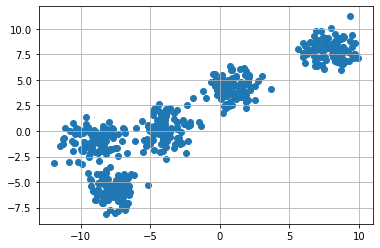

In [5]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

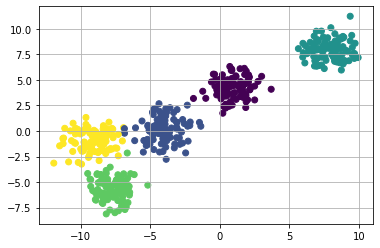

In [6]:
# learning
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1], c = y)
plt.show()

In [7]:
k = 5

color  = ["green","red","blue","yellow","orange"]

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color': color[i]
        }
    
    clusters[i] = cluster

In [8]:
# learning
X.shape
print(X.shape)
print(X.shape[1])
center = np.random.random((X.shape[1],))
print(center)
center.shape
print(2*np.random.random((X.shape[1],)))
print(2*np.random.random((X.shape[1],))-1)
print(10*(2*np.random.random((X.shape[1],))-1))

(500, 2)
2
[0.53090563 0.30930553]
[0.02594888 1.64051658]
[0.75070698 0.76275762]
[0.48906992 2.5830612 ]


In [9]:
clusters

{0: {'center': array([-4.51269031, -3.68125555]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.78092605, -8.45072781]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-6.58367394,  8.26269174]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-4.85747879,  8.77613422]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([0.60665529, 9.45717018]),
  'points': [],
  'color': 'orange'}}

In [10]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [11]:
def assignPointToClusters(clusters): #E-Step
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list 

In [12]:
def plotClusters(clusters):
    
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

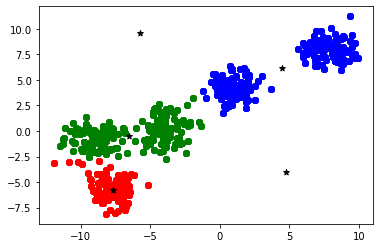

In [20]:
assignPointToClusters(clusters)
plotClusters(clusters)

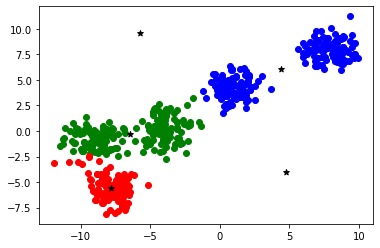

In [22]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

In [ ]:
distortions = []
num_of_clusters = range(1, 7)

for i in num_of_clusters:
    cluster_center, distrotion = kmeans()